#### Importing all the necessary libraries 

In [ ]:
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm 
from skimage.metrics import structural_similarity as ssim 
from skimage import color, exposure

#### DataExploration and visualization of the characteristics of the dataset

In [ ]:
# Set the actual path to your dataset we work on 
dataset_path = "F://QR-Code-Authentication//Dataset" 


classes = os.listdir(dataset_path)
print("Classes in the dataset:", classes)  # Listing out the names and number of classes in our dataset

# Count the number of images in each class
class_counts = {}
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    class_counts[class_name] = len(os.listdir(class_path))
print("Number of images per class:", class_counts)

Classes in the dataset: ['First Print', 'Second Print']
Number of images per class: {'First Print': 100, 'Second Print': 100}


Displaying samples for class: First Print


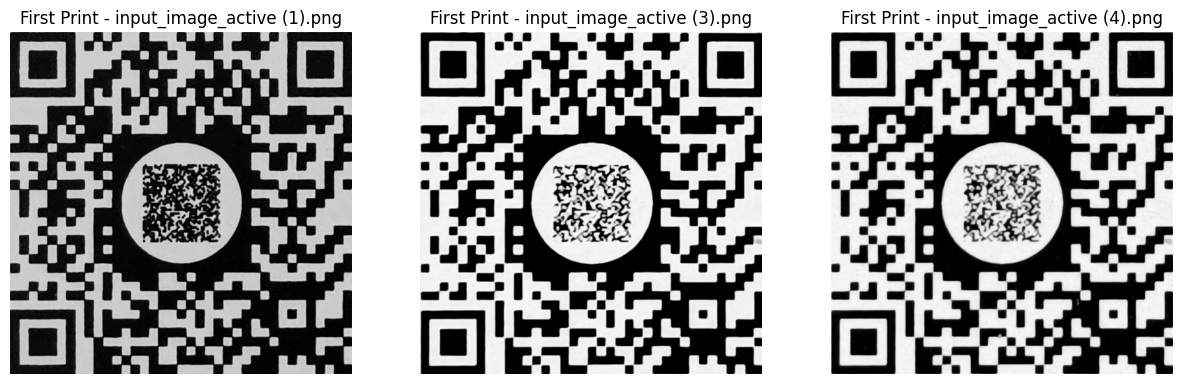

Displaying samples for class: Second Print


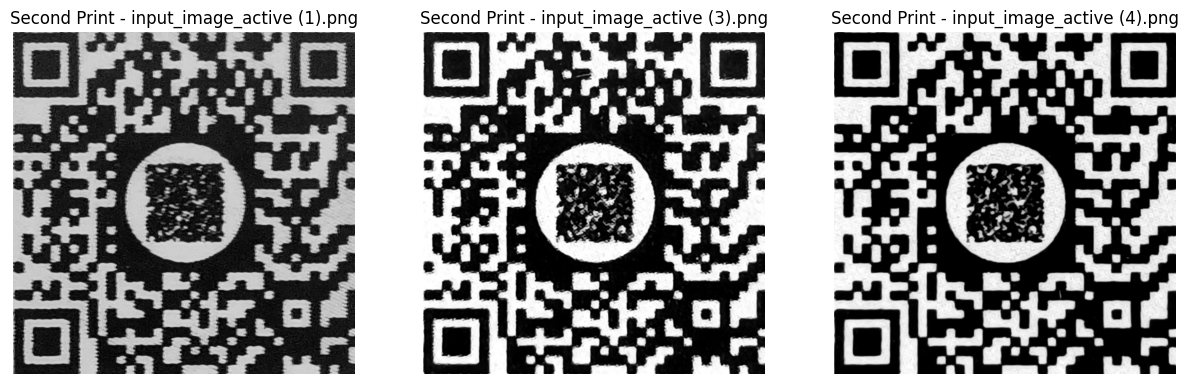

In [ ]:
# Function to display sample images from each class

def display_samples(dataset_path, class_name, num_samples=3):
    class_path = os.path.join(dataset_path, class_name)
    images = os.listdir(class_path)[:num_samples]  
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(f"{class_name} - {img_name}")
        plt.axis('off')
    plt.show()


for class_name in classes:
    print(f"Displaying samples for class: {class_name}")
    display_samples(dataset_path, class_name)

In [ ]:
# Function to compute basic statistics for a each class

def compute_statistics(dataset_path, class_name):
    class_path = os.path.join(dataset_path, class_name)
    images = os.listdir(class_path)
    pixel_values = []
    for img_name in images:
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
        pixel_values.extend(img.flatten())  
    return {
        "mean": np.mean(pixel_values),
        "std": np.std(pixel_values),
        "min": np.min(pixel_values),
        "max": np.max(pixel_values)
    }


statistics = {}
for class_name in classes:
    statistics[class_name] = compute_statistics(dataset_path, class_name)
    print(f"Statistics for {class_name}: {statistics[class_name]}")

Statistics for First Print: {'mean': np.float64(122.39228511364075), 'std': np.float64(103.46826575799196), 'min': np.uint8(0), 'max': np.uint8(255)}
Statistics for Second Print: {'mean': np.float64(105.80734572369468), 'std': np.float64(99.30080443636676), 'min': np.uint8(0), 'max': np.uint8(255)}


Processing Second Print: 100%|██████████| 50/50 [00:03<00:00, 15.95it/s]


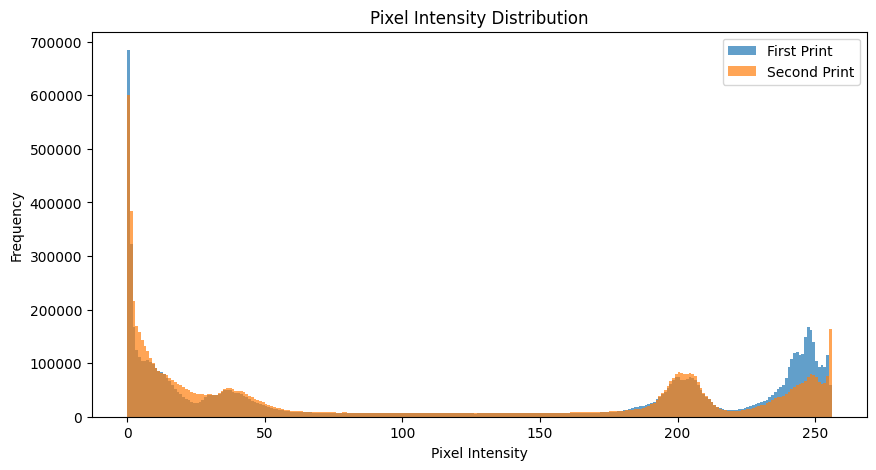

In [ ]:
# Function to plot pixel intensity histogram for each class

def plot_pixel_histogram(dataset_path, class_name, num_samples=50, downsample_factor=0.5):
    class_path = os.path.join(dataset_path, class_name)
    images = os.listdir(class_path)[:num_samples]
    pixel_values = []
    
    for img_name in tqdm(images, desc=f"Processing {class_name}"):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # Downsample to speed up processing
        img = cv2.resize(img, None, fx=downsample_factor, fy=downsample_factor)
        pixel_values.extend(img.flatten())
    
    plt.hist(pixel_values, bins=256, range=(0, 256), alpha=0.7, label=class_name)
    plt.title("Pixel Intensity Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()



plt.figure(figsize=(10, 5))
plot_pixel_histogram(dataset_path, "First Print")
plot_pixel_histogram(dataset_path, "Second Print")
plt.show()

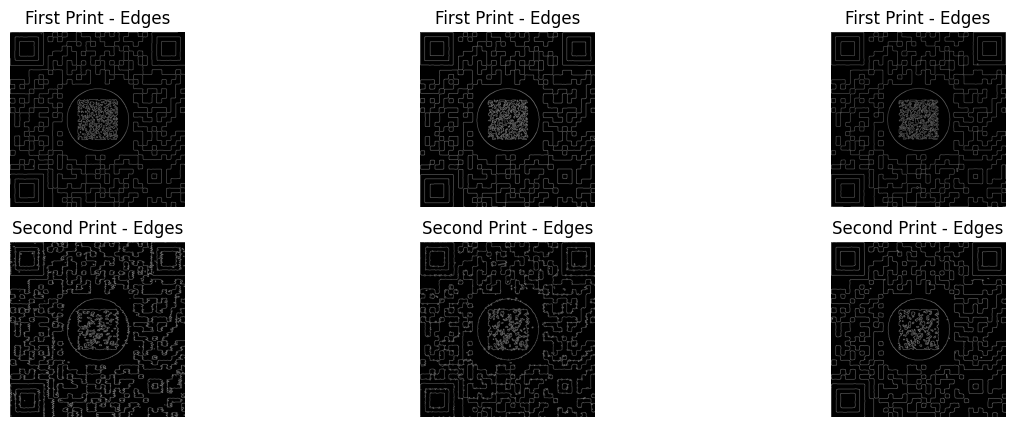

In [ ]:
# Function to detect edges using Canny edge detection

def detect_edges(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)  # Adjust thresholds as needed
    return edges

# Function to compare edge detection between classes

def compare_edges(dataset_path, class1, class2, num_samples=3):
    class1_path = os.path.join(dataset_path, class1)
    class2_path = os.path.join(dataset_path, class2)
    images1 = os.listdir(class1_path)[:num_samples]
    images2 = os.listdir(class2_path)[:num_samples]
    plt.figure(figsize=(15, 5))
    for i, (img1_name, img2_name) in enumerate(zip(images1, images2)):
        img1_path = os.path.join(class1_path, img1_name)
        img2_path = os.path.join(class2_path, img2_name)
        img1 = cv2.imread(img1_path)
        img2 = cv2.imread(img2_path)
        edges1 = detect_edges(img1)
        edges2 = detect_edges(img2)
        plt.subplot(2, num_samples, i+1)
        plt.imshow(edges1, cmap='gray')
        plt.title(f"{class1} - Edges")
        plt.axis('off')
        plt.subplot(2, num_samples, i+1+num_samples)
        plt.imshow(edges2, cmap='gray')
        plt.title(f"{class2} - Edges")
        plt.axis('off')
    plt.show()


compare_edges(dataset_path, "First Print", "Second Print")

In [ ]:
# Save statistics to a CSV file

stats_df = pd.DataFrame(statistics).T
stats_df.to_csv("dataset_statistics.csv")
print("Statistics saved to dataset_statistics.csv")

Statistics saved to dataset_statistics.csv


Comparing input_image_active (1).png and input_image_active (1).png:
 - Edge Pixels: 31344 vs 39443
 - Sharpness: 22994.00 vs 39187.95
 - Structural Similarity Index (SSIM): 0.5614
--------------------------------------------------


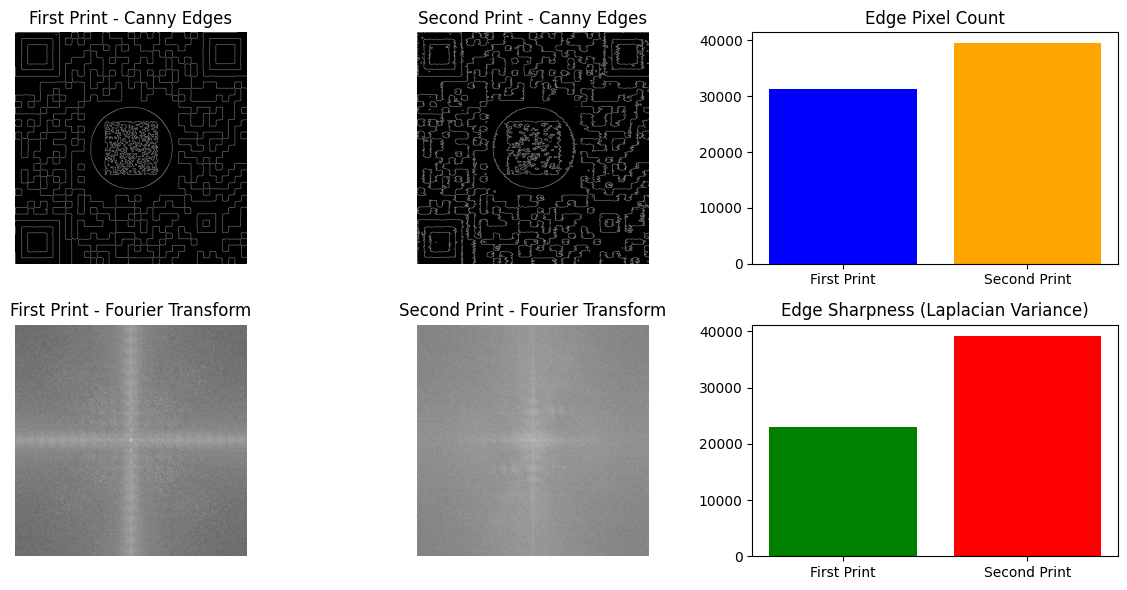

Comparing input_image_active (3).png and input_image_active (3).png:
 - Edge Pixels: 28482 vs 40551
 - Sharpness: 25890.03 vs 32185.59
 - Structural Similarity Index (SSIM): 0.4970
--------------------------------------------------


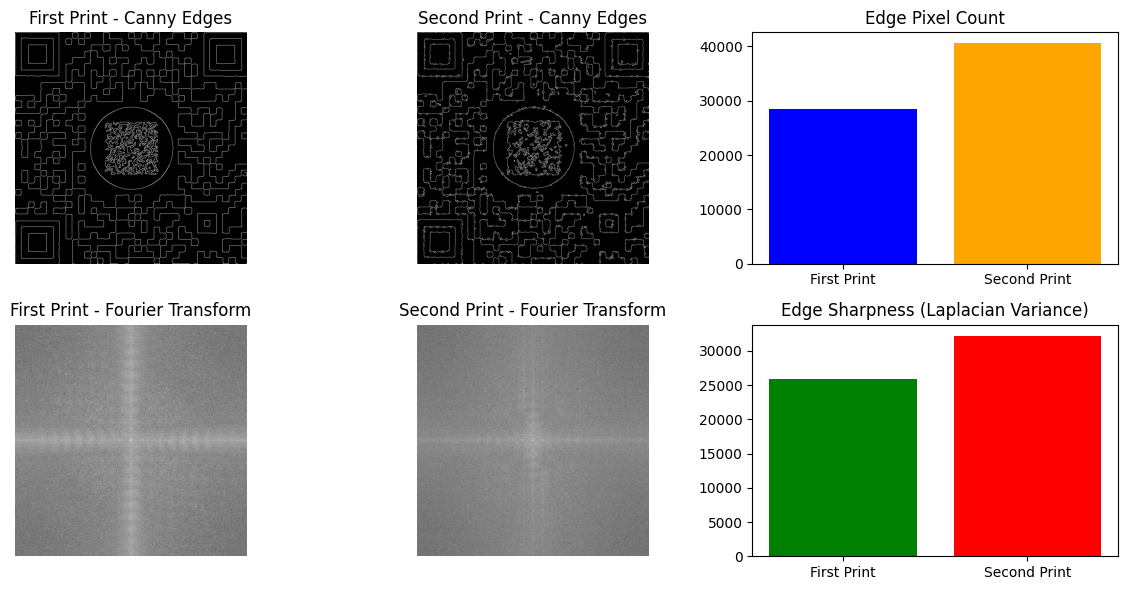

Comparing input_image_active (4).png and input_image_active (4).png:
 - Edge Pixels: 35343 vs 27915
 - Sharpness: 22521.78 vs 24622.40
 - Structural Similarity Index (SSIM): 0.5824
--------------------------------------------------


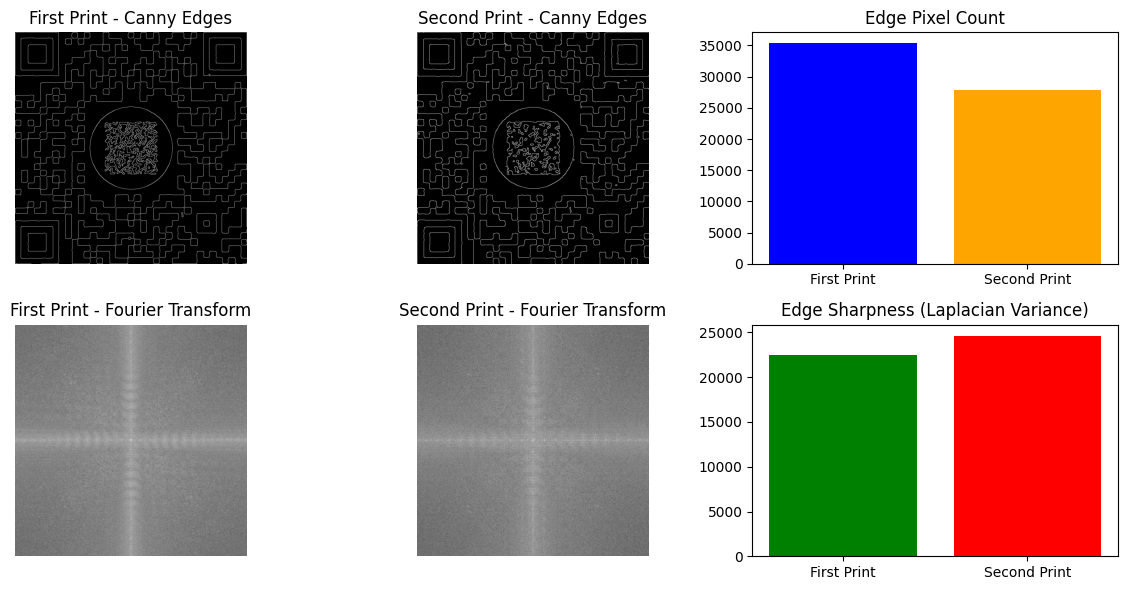

In [ ]:
# Function to detect edges using Canny edge detection

def detect_edges(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)  # Adjust thresholds as needed
    return edges

# Function to compute edge pixel count & sharpness

def edge_analysis(image):
    edges = detect_edges(image)
    
    # Edge pixel count
    edge_pixel_count = np.sum(edges > 0)
    
    # Edge sharpness (Laplacian variance)
    sharpness = cv2.Laplacian(edges, cv2.CV_64F).var()
    
    return edges, edge_pixel_count, sharpness

# Function to compute Structural Similarity Index (SSIM)

def compute_ssim(image1, image2):
    image1 = detect_edges(image1)
    image2 = detect_edges(image2)

    # Resize images to the same shape
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]), interpolation=cv2.INTER_AREA)

    score, _ = ssim(image1, image2, full=True)
    return score


# Function for Fourier Transform Analysis

def fourier_transform(image):
    edges = detect_edges(image)
    f = np.fft.fft2(edges)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # Log transformation for visualization
    return magnitude_spectrum

# Compare two classes
def compare_images(dataset_path, class1, class2):
    class1_path = os.path.join(dataset_path, class1)
    class2_path = os.path.join(dataset_path, class2)

    images1 = os.listdir(class1_path)[:3]
    images2 = os.listdir(class2_path)[:3]

    for img1_name, img2_name in zip(images1, images2):
        img1_path = os.path.join(class1_path, img1_name)
        img2_path = os.path.join(class2_path, img2_name)

        img1 = cv2.imread(img1_path)
        img2 = cv2.imread(img2_path)

        # Edge Analysis
        edges1, edge_count1, sharpness1 = edge_analysis(img1)
        edges2, edge_count2, sharpness2 = edge_analysis(img2)

        # SSIM
        similarity = compute_ssim(img1, img2)

        # Fourier Transform
        fourier1 = fourier_transform(img1)
        fourier2 = fourier_transform(img2)

        # Print Results
        print(f"Comparing {img1_name} and {img2_name}:")
        print(f" - Edge Pixels: {edge_count1} vs {edge_count2}")
        print(f" - Sharpness: {sharpness1:.2f} vs {sharpness2:.2f}")
        print(f" - Structural Similarity Index (SSIM): {similarity:.4f}")
        print("-" * 50)

        # Plotting Results
        plt.figure(figsize=(12, 6))

        plt.subplot(2, 3, 1)
        plt.imshow(edges1, cmap='gray')
        plt.title(f"{class1} - Canny Edges")
        plt.axis('off')

        plt.subplot(2, 3, 2)
        plt.imshow(edges2, cmap='gray')
        plt.title(f"{class2} - Canny Edges")
        plt.axis('off')

        plt.subplot(2, 3, 3)
        plt.bar(['First Print', 'Second Print'], [edge_count1, edge_count2], color=['blue', 'orange'])
        plt.title("Edge Pixel Count")

        plt.subplot(2, 3, 4)
        plt.imshow(fourier1, cmap='gray')
        plt.title(f"{class1} - Fourier Transform")
        plt.axis('off')

        plt.subplot(2, 3, 5)
        plt.imshow(fourier2, cmap='gray')
        plt.title(f"{class2} - Fourier Transform")
        plt.axis('off')

        plt.subplot(2, 3, 6)
        plt.bar(['First Print', 'Second Print'], [sharpness1, sharpness2], color=['green', 'red'])
        plt.title("Edge Sharpness (Laplacian Variance)")

        plt.tight_layout()
        plt.show()

# Dataset Path
dataset_path = "F://QR-Code-Authentication//Dataset"

compare_images(dataset_path, "First Print", "Second Print")
